In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [2]:
df = pd.read_csv('SuperStoreOrders.csv', parse_dates = ['order_date', 'ship_date'])

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  object        
 15  qu

In [5]:
# Changing the sales column to numeric data
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [6]:
df.shape

(51290, 21)

In [7]:
# Looking for any null values
df.isna().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [8]:
df[df['sales'].isna()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
27,MX-2011-111255,2011-04-01,2011-09-01,Second Class,Russell Applegate,Consumer,Parana,Brazil,LATAM,South,...,Furniture,Bookcases,"Dania Classic Bookcase, Pine",NaN,6,0.000,609.8400,109.13,Medium,2011
43,MX-2011-109267,2011-05-01,2011-09-01,Standard Class,Jennifer Halladay,Consumer,Veracruz,Mexico,LATAM,North,...,Office Supplies,Appliances,"Hoover Stove, Black",NaN,8,0.000,999.3600,191.20,Medium,2011
58,CA-2011-167199,2011-07-01,2011-11-01,Standard Class,Maria Etezadi,Home Office,Kentucky,United States,US,South,...,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,NaN,9,0.000,746.4078,258.99,High,2011
83,AO-2011-1670,2011-08-01,2011-01-13,Standard Class,Henia Zydlo,Consumer,Benguela,Angola,Africa,Africa,...,Furniture,Bookcases,"Ikea Classic Bookcase, Pine",NaN,6,0.000,49.5000,349.87,High,2011
84,IN-2011-19330,2011-08-01,2011-12-01,Second Class,Nicole Fjeld,Home Office,Yunnan,China,APAC,North Asia,...,Technology,Machines,"Panasonic Inkjet, White",NaN,7,0.000,260.8200,275.52,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51151,MX-2014-167682,2014-12-30,2015-03-01,Standard Class,Jill Fjeld,Consumer,Pará,Brazil,LATAM,South,...,Furniture,Bookcases,"Safco Library with Doors, Mobile",NaN,7,0.000,768.8800,155.85,High,2014
51152,US-2014-158526,2014-12-30,2015-02-01,Second Class,Katherine Hughes,Consumer,Kentucky,United States,US,South,...,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,NaN,8,0.000,314.0384,139.47,Medium,2014
51228,MX-2014-116267,2014-12-31,2015-03-01,Second Class,Erica Bern,Corporate,São Paulo,Brazil,LATAM,South,...,Technology,Copiers,"Canon Wireless Fax, Color",NaN,5,0.002,301.4660,253.25,High,2014
51229,IN-2014-43550,2014-12-31,2015-01-01,First Class,Marina Lichtenstein,Corporate,Jakarta,Indonesia,APAC,Southeast Asia,...,Furniture,Bookcases,"Safco Library with Doors, Pine",NaN,3,0.070,46.9206,243.11,High,2014


In [9]:
df['sales'] = df['sales'].fillna(0)

In [10]:
# Creating a column to calculate the number of days between order_date and ship_date
df['Days_Waited'] = abs((df['ship_date'] - df['order_date']).dt.days)

In [11]:
df[df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,Days_Waited


In [12]:
# Descriptive statistics of the data
df.describe()

,sales,quantity,discount,profit,shipping_cost,year,Days_Waited
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,152.761318,3.476545,0.142908,28.641740,26.375915,2012.777208,61.420784
std,199.062579,2.278766,0.212280,174.424113,57.296804,1.098931,76.239595
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,0.000000
25%,24.000000,2.000000,0.000000,0.000000,2.610000,2012.000000,4.000000
50%,68.000000,3.000000,0.000000,9.240000,7.790000,2013.000000,7.000000
75%,196.000000,5.000000,0.200000,36.810000,24.450000,2014.000000,121.000000
max,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000,322.000000


### What is the preferred shipping method?

In [13]:
df_Days_Waited_by_ship_mode = df[['order_date','ship_date','ship_mode', 'Days_Waited']]

<AxesSubplot:ylabel='ship_mode'>

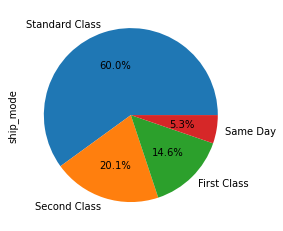

In [73]:
df['ship_mode'].value_counts().plot.pie(autopct='%1.1f%%')

### What are the average number of days it takes to ship out an order by shipping method? 

In [15]:
df_Days_Waited_by_ship_mode.groupby(['ship_mode']).mean()

,Days_Waited
ship_mode,
First Class,41.939507
Same Day,1.000000
Second Class,53.036376
Standard Class,74.283119


### Which segment is the best selling?

In [16]:
df['segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='Count'>

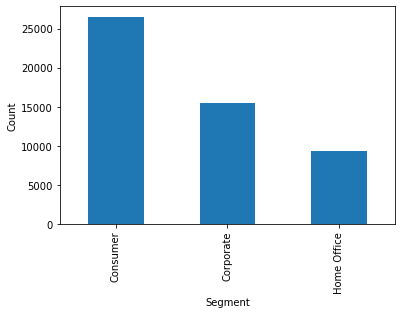

In [17]:
df['segment'].value_counts().plot.bar(xlabel = 'Segment', ylabel = 'Count')

### Who are the top customers? What is the profit from these customers?

In [18]:
df['customer_name'].value_counts()[:10]

Muhammed Yedwab        108
Steven Ward            106
Bill Eplett            102
Gary Hwang             102
Patrick O'Brill        102
Harry Greene           101
Eric Murdock           100
Art Ferguson            98
Brosina Hoffman         97
Chloris Kastensmidt     96
Name: customer_name, dtype: int64

In [19]:
customers = list(df['customer_name'].value_counts()[:10].index)
top10 = df['customer_name'].isin(customers)
top10_df = df[top10]

In [20]:
top10_profit = top10_df.groupby('customer_name')['profit'].sum()
top10_profit

customer_name
Art Ferguson           2278.30370
Bill Eplett            7410.00530
Brosina Hoffman        4876.93980
Chloris Kastensmidt     965.81294
Eric Murdock           3306.01548
Gary Hwang             3908.11510
Harry Greene           -291.49228
Muhammed Yedwab        2642.65408
Patrick O'Brill        3778.36370
Steven Ward            2794.73160
Name: profit, dtype: float64

Harry Greene is in the top 10 customers, however Harry's profit is in the negative so it is a loss. I will remove Harry from the list.

In [21]:
top10_df = top10_df[top10_df['customer_name'] != 'Harry Greene']

In [22]:
del customers[5]

In [29]:
top9_profit = top10_df.groupby('customer_name')['profit'].sum().sort_values(ascending= False)
top9_profit

customer_name
Bill Eplett            7410.00530
Brosina Hoffman        4876.93980
Gary Hwang             3908.11510
Patrick O'Brill        3778.36370
Eric Murdock           3306.01548
Steven Ward            2794.73160
Muhammed Yedwab        2642.65408
Art Ferguson           2278.30370
Chloris Kastensmidt     965.81294
Name: profit, dtype: float64

Text(0.5, 1.0, 'Profit Partition of Top 9 Customers')

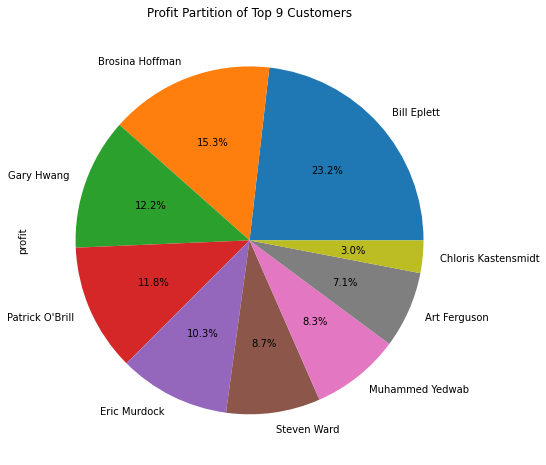

In [32]:
top10_df.groupby(top10_df['customer_name'])['profit'].sum().sort_values(ascending = 
    False).plot.pie(autopct='%1.1f%%', figsize = (8,8))
plt.title('Profit Partition of Top 9 Customers')

### Which regions have the highest and lowest number of orders?

In [34]:
df['region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: region, dtype: int64

The Central region is the top seller while Canada is the lowest.

### Which states are the top 10 selling states in the United States? What are their profit partition?

In [43]:
mask = df['country'] == 'United States'
USA = df[mask]

In [44]:
USA['state'].value_counts()[0:10]

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: state, dtype: int64

Text(0.5, 1.0, 'Profit Partition of Top 10 States')

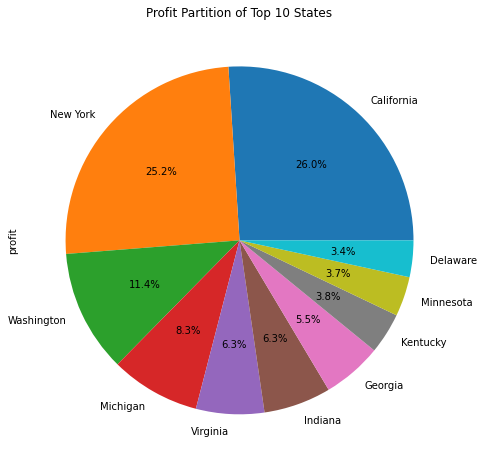

In [49]:
USA.groupby(USA['state'])['profit'].sum().sort_values(ascending = False)[0:10].plot.pie(autopct='%1.1f%%', figsize = (8,8))
plt.title('Profit Partition of Top 10 States')

### What is the top selling and least selling sub-category?

In [50]:
df['sub_category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: sub_category, dtype: int64

In [60]:
df['sub_category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: sub_category, dtype: int64

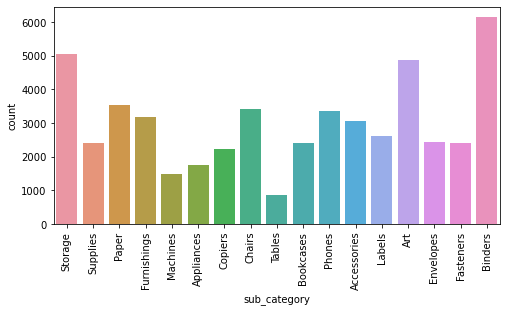

In [68]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['sub_category'])
plt.xticks(rotation=90)
plt.show()

### What is the most profitable sub-category?

In [71]:
category_prof = df.groupby('sub_category')['profit'].sum().sort_values(ascending= False)
category_prof

sub_category
Copiers        258567.54818
Phones         216717.00580
Bookcases      161924.41950
Chairs         141973.79750
Appliances     141680.58940
Accessories    129626.30620
Storage        108461.48980
Binders         72449.84600
Paper           59207.68270
Machines        58867.87300
Art             57953.91090
Furnishings     46967.42550
Envelopes       29601.11630
Supplies        22583.26310
Labels          15010.51200
Fasteners       11525.42410
Tables         -64083.38870
Name: profit, dtype: float64

### What are the top 10 most selling products?

In [75]:
most_sold = pd.DataFrame(df.groupby(['product_name']).sum()['quantity'])
most_sold.sort_values('quantity',ascending=False)[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


### What is the profit/loss and net profit from 2011-2014?

In [82]:
df_prof = df[df['profit'] > 0]
df_loss = df[df['profit'] < 0]

In [85]:
# Profit sum
profit = df_prof['profit'].sum()
profit

2389392.212

In [86]:
# Total Loss
loss = df_loss['profit'].sum()
loss

-920357.39072

In [87]:
net_profit = profit - loss
net_profit

3309749.60272

# Insights

The preferred method of shipping is standard class. 

The best selling segment is the consumer segment.

Central region is the best selling region while Canada is the lowest.

In the United States, California has the most number of orders followed by New York.

Binders are the top selling sub-category however they are not the most profitable. The most profitable sub-category is Copiers.

Staples are the most selling product.

The business has a net profit of 3309749.60272 from 2011-2014.

# Recommendations

The business should expand its business by marketing more in Canada to help improve it's sales in that region. 

If the company wants to keep increasing it's profits, it should promote selling copiers more. Copiers are not the top selling product but it is the most profitable when sold.